In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

In [8]:
data = load_boston()

In [9]:
boston_data = pd.DataFrame(data.data, columns=data.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_data['MEDV'] = data.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
x = boston_data[['AGE', 'LSTAT']]
x.head()

,AGE,LSTAT
0,65.2,4.98
1,78.9,9.14
2,61.1,4.03
3,45.8,2.94
4,54.2,5.33


In [41]:
y = boston_data[['MEDV']]
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [42]:
x = x.to_numpy()
y = y.to_numpy()

In [43]:
m = np.matmul(np.linalg.inv(np.matmul(x.T, x)), np.matmul(x.T, y))
m

array([[ 0.392757  ],
       [-0.71798878]])

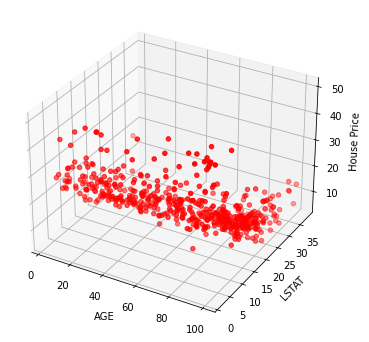

In [44]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='red')
ax.set_xlabel('AGE')
ax.set_ylabel('LSTAT')
ax.set_zlabel('House Price')
plt.show()

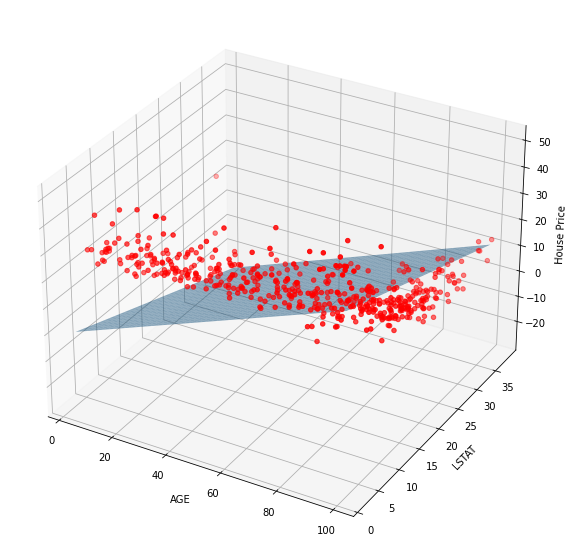

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

x_arange = np.arange(x[:,0].min(), x[:,0].max())
y_arange = np.arange(x[:,1].min(), x[:,1].max())
px, py = np.meshgrid(x_arange, y_arange)
 
pz = px * m[0] + py * m[1]
ax.plot_surface(px, py, pz, alpha = 0.5)
ax.scatter(x[:,0], x[:,1], y, c='red')
ax.set_xlabel("AGE")
ax.set_ylabel("LSTAT")
ax.set_zlabel("House Price")
plt.show()